# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

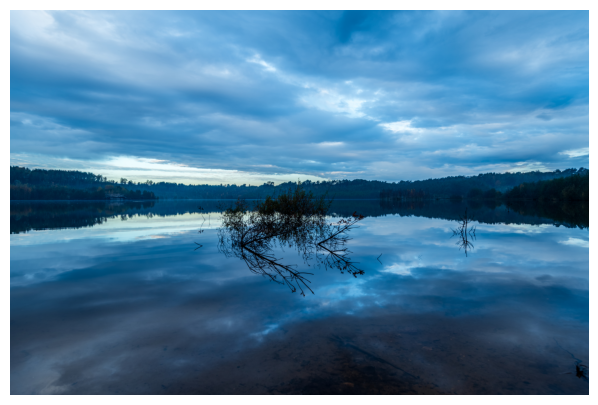

In [6]:
img = cv2.imread('../data/nature.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)/255.0
plt.imshow(img)
plt.axis('off')
plt.show()

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x12f346990>)

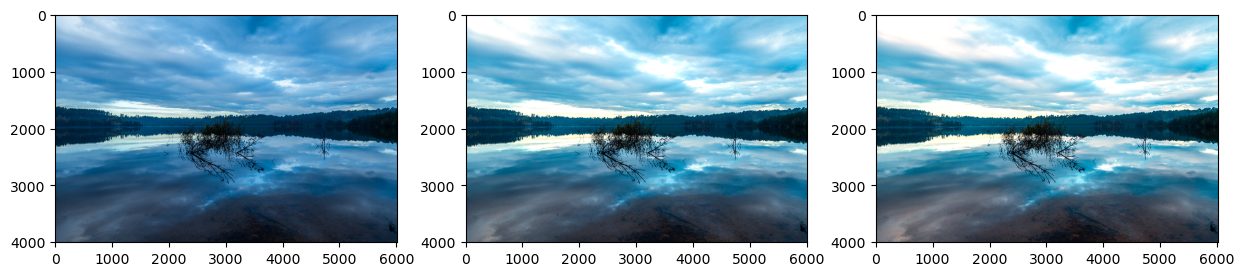

In [15]:
# Define white patch and the coefficients
row, col = 485, 864
white = img[row, col, :]
coeffs = 255.0/white

row2, col2 = 485, 5500
white2 = img[row2, col2, :]
coeffs2 = 255.0/white2

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
balanced2 = np.zeros_like(img, dtype=np.float32)

for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]
    balanced2[..., channel] = img[..., channel] * coeffs2[channel]


# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

balanced2 = balanced2/255
balanced2[balanced2 > 1] = 1

plt.subplot(131), plt.imshow(img)
plt.subplot(132), plt.imshow(balanced)
plt.subplot(133), plt.imshow(balanced2)


### Gray world
This algorithm assumes that a scene, on average, is gray.

(<Axes: >, <matplotlib.image.AxesImage at 0x12f6b1590>)

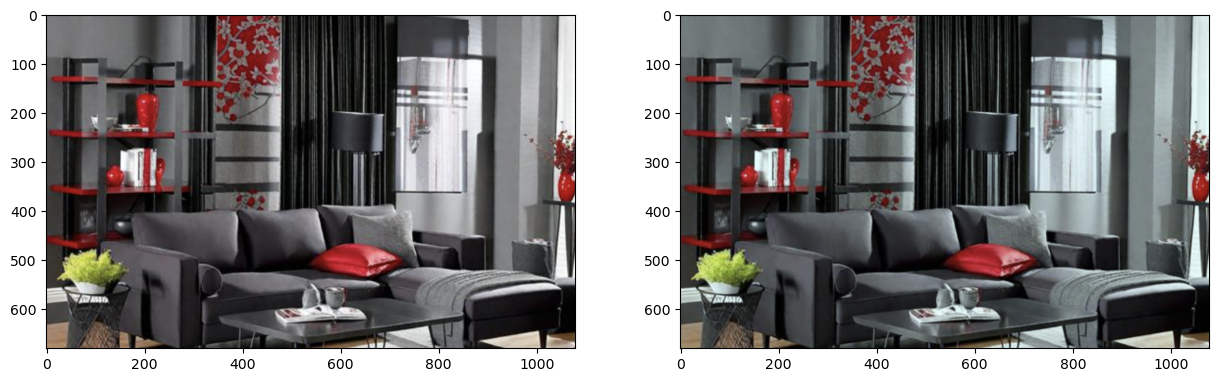

In [19]:
# Load your image
img = cv2.imread('../data/greyred.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[..., 0])
mean_g = np.mean(img[..., 1])
mean_b = np.mean(img[..., 2])

# Compute the coefficients kr, kg, kb
# Fix the value of the coefficient associated with the brightest color channel to 1
max_mean = max(mean_r, mean_g, mean_b)

if max_mean == mean_r:
    kr = 1
    kg = mean_r / mean_g
    kb = mean_r / mean_b
elif max_mean == mean_g:
    kr = mean_g / mean_r
    kg = 1
    kb = mean_g / mean_b
else:
    kr = mean_b / mean_r
    kg = mean_b / mean_g
    kb = 1

# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)

balanced[..., 0] = img[..., 0] * kr
balanced[..., 1] = img[..., 1] * kg
balanced[..., 2] = img[..., 2] * kb

# Normalize image values to range [0, 1] for display
balanced = balanced / np.max(balanced)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

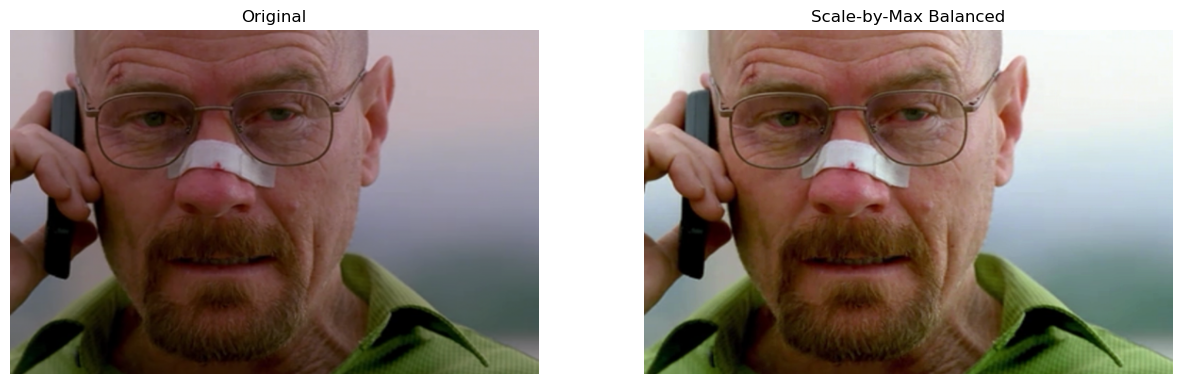

In [23]:
# Load your image
img = cv2.imread('../data/walter.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0  # Normalize to range [0, 1]

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(img[..., 0])
max_g = np.max(img[..., 1])
max_b = np.max(img[..., 2])

# Apply scale-by-max balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)

balanced[..., 0] = img[..., 0] / max_r
balanced[..., 1] = img[..., 1] / max_g
balanced[..., 2] = img[..., 2] / max_b

# Clip pixel values to ensure they are in the range [0, 1]
balanced = np.clip(balanced, 0, 1)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(122), plt.imshow(balanced)
plt.title("Scale-by-Max Balanced")
plt.axis('off')

plt.show()